In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
df = pd.read_csv("all_tweets_predicted_bert93.csv")
len(df)

58864

In [4]:
df.groupby(['Partei']).size().reset_index(name='counts')

,Partei,counts
0,AfD,11625
1,CDU/CSU,10072
2,DieLinke,9628
3,FDP,6610
4,Gruene,9576
5,SPD,11353


In [5]:
afd = df[df["Partei"] == "AfD"]
cducsu = df[df["Partei"] == "CDU/CSU"]
linke = df[df["Partei"] == "DieLinke"]
fdp = df[df["Partei"] == "FDP"]
gruene = df[df["Partei"] == "Gruene"]
spd = df[df["Partei"] == "SPD"]

In [20]:
# group by party and look at sentiment distribution per party

In [18]:
# wordclouds per Party und insgesamt
# Create and generate a word cloud image:

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words("german"))

def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxiw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxiw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
afd["Embedded_text"][0]

'AfD wirkt.\n\nSchluss mit dem #Gendergaga\nMDR AKTUELL\n@MDRAktuell\n · 26. März\nGenderstern kommt nicht ins Regelwerk der deutschen Sprache. Das beschloss der Rat für deutsche Rechtschreibung in Mannheim. Man orientiere sich an Lesbarkeit und Verständlichkeit.\n4\n28\n132'

In [8]:
clean_text(afd["Embedded_text"][0])

'afd wirkt schluss gendergaga mdr aktuell mdraktuell märz genderstern kommt regelwerk deutschen sprache beschloss rat deutsche rechtschreibung mannheim orientiere lesbarkeit verständlichkeit'

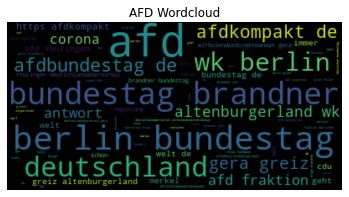

In [10]:
afd_text = " ".join(review for review in afd.Embedded_text)
afd_text = clean_text(afd_text)

stopwords = set(STOPWORDS)
stopwords.update(["mehr", "heute"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="black",max_words=100).generate(afd_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("AFD Wordcloud")
plt.axis("off")
plt.show()
wordcloud.to_file("afd_wordcloud.png")

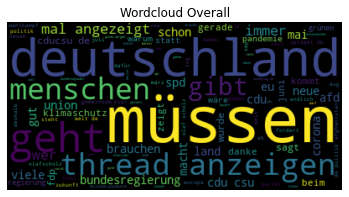

In [77]:
#text = " ".join(review for review in df.Embedded_text)
#text = clean_text(text)

stopwords = set(STOPWORDS)
stopwords.update(["mehr", "heute"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="black",max_words=100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud Overall")
plt.axis("off")
plt.show()
wordcloud.to_file("overall_wordcloud.png")

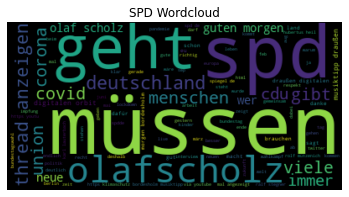

In [67]:
spd_text = " ".join(review for review in spd.Embedded_text)
spd_text = clean_text(spd_text)

stopwords = set(STOPWORDS)
stopwords.update(["mehr", "heute"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="black",max_words=100).generate(spd_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("SPD Wordcloud")
plt.axis("off")
plt.show()
wordcloud.to_file("spd_wordcloud.png")

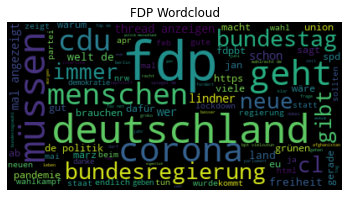

In [68]:
fdp_text = " ".join(review for review in fdp.Embedded_text)
fdp_text = clean_text(fdp_text)

stopwords = set(STOPWORDS)
stopwords.update(["mehr", "heute"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="black",max_words=100).generate(fdp_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("FDP Wordcloud")
plt.show()
wordcloud.to_file("fdp_wordcloud.png")

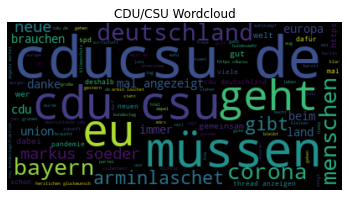

In [69]:
cducsu_text = " ".join(review for review in cducsu.Embedded_text)
cducsu_text = clean_text(cducsu_text)

stopwords = set(STOPWORDS)
stopwords.update(["mehr", "heute"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="black",max_words=100).generate(cducsu_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("CDU/CSU Wordcloud")
plt.axis("off")
plt.show()
wordcloud.to_file("cducsu_wordcloud.png")

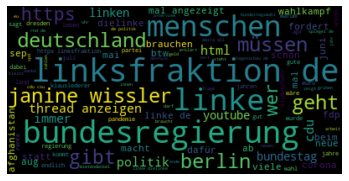

In [62]:
linke_text = " ".join(review for review in linke.Embedded_text)
linke_text = clean_text(linke_text)

stopwords = set(STOPWORDS)
stopwords.update(["mehr", "heute"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="black",max_words=100).generate(linke_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Die Linke Wordcloud")
plt.axis("off")
plt.show()
wordcloud.to_file("linke_wordcloud.png")

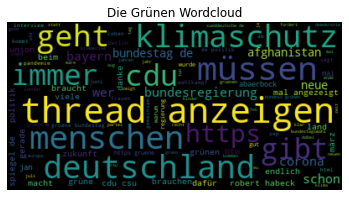

In [70]:
gruene_text = " ".join(review for review in gruene.Embedded_text)
gruene_text = clean_text(gruene_text)

stopwords = set(STOPWORDS)
stopwords.update(["mehr", "heute"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="black",max_words=100).generate(gruene_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Die Grünen Wordcloud")
plt.axis("off")
plt.show()
wordcloud.to_file("gruene_wordcloud.png")

In [ ]:
# plot sentiment in general over time

In [ ]:
# plot sentiment per party over time

# Negativer und Positiver Sentiment

In [11]:
afd = df[df["Partei"] == "AfD"]
cducsu = df[df["Partei"] == "CDU/CSU"]
linke = df[df["Partei"] == "DieLinke"]
fdp = df[df["Partei"] == "FDP"]
gruene = df[df["Partei"] == "Gruene"]
spd = df[df["Partei"] == "SPD"]

In [9]:
# group by party and look at sentiment distribution per party
afd_pos = afd[afd["sentiment_prediction"] == 0].Embedded_text
afd_neg = afd[afd["sentiment_prediction"] == 1].Embedded_text
afd_neutr = afd[afd["sentiment_prediction"] == 2].Embedded_text

# group by party and look at sentiment distribution per party
spd_pos = spd[spd["sentiment_prediction"] == 0].Embedded_text
spd_neg = spd[spd["sentiment_prediction"] == 1].Embedded_text
spd_neutr = spd[spd["sentiment_prediction"] == 2].Embedded_text

# group by party and look at sentiment distribution per party
linke_pos = linke[linke["sentiment_prediction"] == 0].Embedded_text
linke_neg = linke[linke["sentiment_prediction"] == 1].Embedded_text
linke_neutr = linke[linke["sentiment_prediction"] == 2].Embedded_text

# group by party and look at sentiment distribution per party
fdp_pos = fdp[fdp["sentiment_prediction"] == 0].Embedded_text
fdp_neg = fdp[fdp["sentiment_prediction"] == 1].Embedded_text
fdp_neutr = fdp[fdp["sentiment_prediction"] == 2].Embedded_text

# group by party and look at sentiment distribution per party
gruene_pos = gruene[gruene["sentiment_prediction"] == 0].Embedded_text
gruene_neg = gruene[gruene["sentiment_prediction"] == 1].Embedded_text
gruene_neutr = gruene[gruene["sentiment_prediction"] == 2].Embedded_text

# group by party and look at sentiment distribution per party
cducsu_pos = cducsu[cducsu["sentiment_prediction"] == 0].Embedded_text
cducsu_neg = cducsu[cducsu["sentiment_prediction"] == 1].Embedded_text
cducsu_neutr = cducsu[cducsu["sentiment_prediction"] == 2].Embedded_text

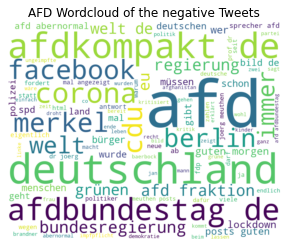

In [14]:
afd_text = " ".join(review for review in afd_neg)
afd_text = clean_text(afd_text)

stopwords = set(STOPWORDS)
stopwords.update(["mehr", "heute", "https", "bundestag"])
# Generate a word cloud image
wordcloud = WordCloud(width=980, height=780,stopwords=stopwords,background_color="white",max_words=100).generate(afd_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("AFD Wordcloud of the negative Tweets")
plt.axis("off")
plt.show()

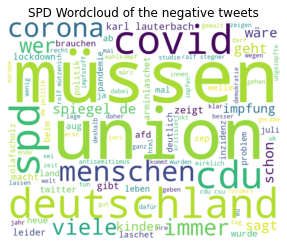

In [17]:
spd_text = " ".join(review for review in spd_neg)
spd_text = clean_text(spd_text)

stopwords = set(STOPWORDS)
stopwords.update(["mehr", "heute","https", "bundestag", "thread", "anzeigen"])
# Generate a word cloud image
wordcloud = WordCloud(width=980, height=780, stopwords=stopwords,background_color="white",max_words=100).generate(spd_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("SPD Wordcloud of the negative tweets")
plt.axis("off")
plt.show()

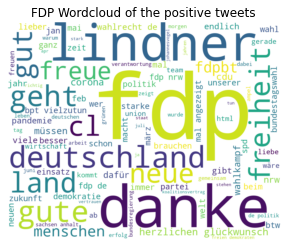

In [19]:
fdp_text = " ".join(review for review in fdp_pos)
fdp_text = clean_text(fdp_text)

# Generate a word cloud image
wordcloud = WordCloud(width=980, height=780, stopwords=stopwords,background_color="white",max_words=100).generate(fdp_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("FDP Wordcloud of the positive tweets")
plt.show()

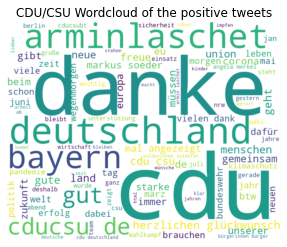

In [23]:
cducsu_text = " ".join(review for review in cducsu_pos)
cducsu_text = clean_text(cducsu_text)

stopwords = set(STOPWORDS)
stopwords.update(["mehr", "heute", "https", "bundestag", "thread", "anzeigen"])
# Generate a word cloud image
wordcloud = WordCloud(width=980, height=780, stopwords=stopwords,background_color="white",max_words=100).generate(cducsu_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("CDU/CSU Wordcloud of the positive tweets")
plt.axis("off")
plt.show()

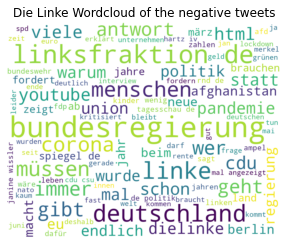

In [25]:
linke_text = " ".join(review for review in linke_neg)
linke_text = clean_text(linke_text)

# Generate a word cloud image
wordcloud = WordCloud(width=980, height=780, stopwords=stopwords,background_color="white",max_words=100).generate(linke_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Die Linke Wordcloud of the negative tweets")
plt.axis("off")
plt.show()

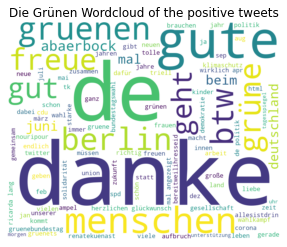

In [27]:
gruene_text = " ".join(review for review in gruene_pos)
gruene_text = clean_text(gruene_text)

# Generate a word cloud image
wordcloud = WordCloud(width=980, height=780,stopwords=stopwords,background_color="white",max_words=100).generate(gruene_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Die Grünen Wordcloud of the positive tweets")
plt.axis("off")
plt.show()